# 一、预处理
数据合并 
删除不需要数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# 读取不同工作表数据
df1 = pd.read_excel('data/meal_order_detail.xlsx', sheet_name='meal_order_detail1')
df1.head() 

,detail_id,order_id,dishes_id,logicprn_name,parent_class_name,dishes_name,itemis_add,counts,amounts,cost,place_order_time,discount_amt,discount_reason,kick_back,add_inprice,add_info,bar_code,picture_file,emp_id
0,2956,417,610062,NaN,NaN,蒜蓉生蚝,0,1,49,NaN,2016-08-01 11:05:36,NaN,NaN,NaN,0,NaN,NaN,caipu/104001.jpg,1442
1,2958,417,609957,NaN,NaN,蒙古烤羊腿,0,1,48,NaN,2016-08-01 11:07:07,NaN,NaN,NaN,0,NaN,NaN,caipu/202003.jpg,1442
2,2961,417,609950,NaN,NaN,大蒜苋菜,0,1,30,NaN,2016-08-01 11:07:40,NaN,NaN,NaN,0,NaN,NaN,caipu/303001.jpg,1442
3,2966,417,610038,NaN,NaN,芝麻烤紫菜,0,1,25,NaN,2016-08-01 11:11:11,NaN,NaN,NaN,0,NaN,NaN,caipu/105002.jpg,1442
4,2968,417,610003,NaN,NaN,蒜香包,0,1,13,NaN,2016-08-01 11:11:30,NaN,NaN,NaN,0,NaN,NaN,caipu/503002.jpg,1442


NaN 缺失值 查看缺失值数量  
info 查看缺失值，直接删除

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2779 entries, 0 to 2778
Data columns (total 19 columns):
detail_id            2779 non-null int64
order_id             2779 non-null int64
dishes_id            2779 non-null int64
logicprn_name        0 non-null float64
parent_class_name    0 non-null float64
dishes_name          2779 non-null object
itemis_add           2779 non-null int64
counts               2779 non-null int64
amounts              2779 non-null int64
cost                 0 non-null float64
place_order_time     2779 non-null datetime64[ns]
discount_amt         0 non-null float64
discount_reason      0 non-null float64
kick_back            0 non-null float64
add_inprice          2779 non-null int64
add_info             0 non-null float64
bar_code             0 non-null float64
picture_file         2779 non-null object
emp_id               2779 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(8), object(2)
memory usage: 412.6+ KB


三表合并，删除缺失列

In [5]:
df2 = pd.read_excel('data/meal_order_detail.xlsx', sheet_name='meal_order_detail2')
df3 = pd.read_excel('data/meal_order_detail.xlsx', sheet_name='meal_order_detail3')
# 合并
df = pd.concat([df1, df2, df3])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 3610
Data columns (total 19 columns):
detail_id            10037 non-null int64
order_id             10037 non-null int64
dishes_id            10037 non-null int64
logicprn_name        0 non-null float64
parent_class_name    0 non-null float64
dishes_name          10037 non-null object
itemis_add           10037 non-null int64
counts               10037 non-null int64
amounts              10037 non-null int64
cost                 0 non-null float64
place_order_time     10037 non-null datetime64[ns]
discount_amt         0 non-null float64
discount_reason      0 non-null float64
kick_back            0 non-null float64
add_inprice          10037 non-null int64
add_info             0 non-null float64
bar_code             0 non-null float64
picture_file         10037 non-null object
emp_id               10037 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(8), object(2)
memory usage: 1.5+ MB


第一种删除

In [6]:
# del df[列明]
# 保留没有缺失数据
# df.isnull().sum()>0 isnull 有缺失值为True  sum求和，如果该列有缺失 数值大于0
# cols = df.columns[df.isnull().sum()>0]
# for i in cols:
#     del df[i]

第二种 按照列删除

In [7]:
df.dropna(axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
detail_id           10037 non-null int64
order_id            10037 non-null int64
dishes_id           10037 non-null int64
dishes_name         10037 non-null object
itemis_add          10037 non-null int64
counts              10037 non-null int64
amounts             10037 non-null int64
place_order_time    10037 non-null datetime64[ns]
add_inprice         10037 non-null int64
picture_file        10037 non-null object
emp_id              10037 non-null int64
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 941.0+ KB


detail_id          10037 non-null int64  
order_id     订单号        10037 non-null int64  
dishes_id    菜品编号       10037 non-null int64  
dishes_name   菜名      10037 non-null object  
itemis_add          10037 non-null int64  
counts       数量         10037 non-null int64  
amounts       单价      10037 non-null int64  
place_order_time 用餐时间   10037 non-null datetime64[ns]  
add_inprice         10037 non-null int64  
picture_file        10037 non-null object  
emp_id     点餐员         10037 non-null int64  

# 二、统计最受欢迎10道菜

Text(0.5, 1.0, '最受欢迎的10个菜品')

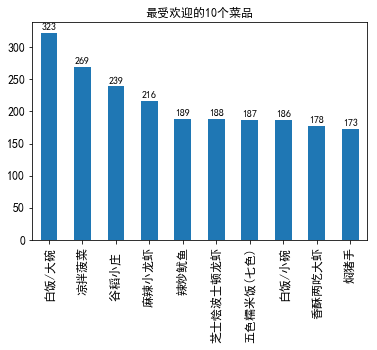

In [9]:
df_dish = df['dishes_name'].value_counts()[:10] # 最受欢迎的10道菜
df_dish.plot(kind='bar', fontsize=12) # 条形图
# 添加具体数据
for x,y in enumerate(df_dish):
    plt.text(x, y+5, y, ha='center') # 横纵坐标、数值, ha 对其位置
plt.title('最受欢迎的10个菜品')

# 三、查看每个员工点菜的总价

对员工进行分组  
总价=单价$\times$数量

In [10]:
# 计算每个菜品总价
df['total']=df['counts']*df['amounts']
df.head()

,detail_id,order_id,dishes_id,dishes_name,itemis_add,counts,amounts,place_order_time,add_inprice,picture_file,emp_id,total
0,2956,417,610062,蒜蓉生蚝,0,1,49,2016-08-01 11:05:36,0,caipu/104001.jpg,1442,49
1,2958,417,609957,蒙古烤羊腿,0,1,48,2016-08-01 11:07:07,0,caipu/202003.jpg,1442,48
2,2961,417,609950,大蒜苋菜,0,1,30,2016-08-01 11:07:40,0,caipu/303001.jpg,1442,30
3,2966,417,610038,芝麻烤紫菜,0,1,25,2016-08-01 11:11:11,0,caipu/105002.jpg,1442,25
4,2968,417,610003,蒜香包,0,1,13,2016-08-01 11:11:30,0,caipu/503002.jpg,1442,13


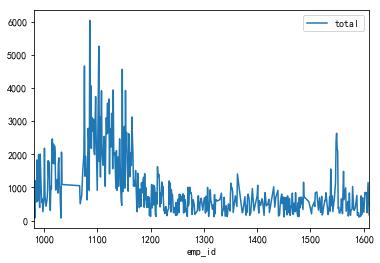

In [13]:
# 每个员工订餐总价格
df.groupby('emp_id').sum().plot(y='total')

In [16]:
# 找出订餐价格最高的5个员工
df.groupby('emp_id').sum().sort_values('total', ascending=False)[:5]['total']

emp_id
1086    6037
1103    5260
1076    4661
1147    4564
1088    4069
Name: total, dtype: int64

# 四、根据订单统计

## 4.1 可视化价格最贵的10道菜  
条形图 条的上方显示数据

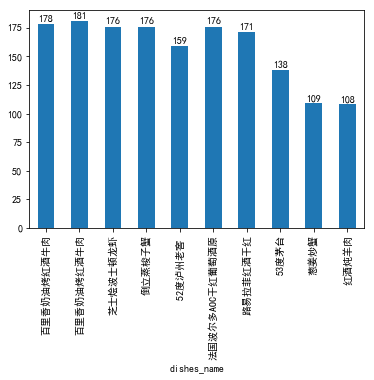

In [31]:
# 1步 按照菜名进行分组，求菜品价格均值
dish_mean = df.groupby('dishes_name').mean()
# 将total变为整数
dish_mean['total'] = dish_mean['total'].astype(np.int)
# 2步 排序查找最贵的10道菜
dish_sort = dish_mean.sort_values('amounts', ascending=False)[:10]['total']
dish_sort.plot(kind='bar')
# 3 添加文字
for x, y in enumerate(dish_sort):
    plt.text(x, y+2, y, ha='center')

## 4.2可视化订单总价以及订单定菜量最多的5条数据
2个图

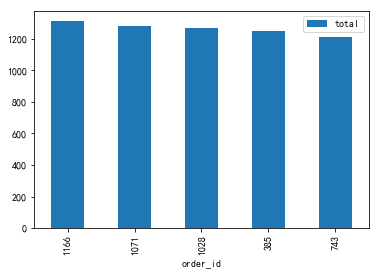

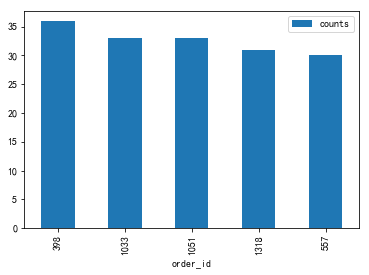

In [34]:
# 可视化订单总价 前5条  
# 对订单号分组，总价求和
df.groupby('order_id').sum().sort_values('total', ascending=False)[:5].plot(y='total', kind='bar')
# 对订单号分组，点菜数量求和
df.groupby('order_id').sum().sort_values('counts', ascending=False)[:5].plot(y='counts', kind='bar')

# 五、时间处理

In [35]:
# 创建一个新字段，类型为时间类型
df['time'] = pd.to_datetime(df['place_order_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 3610
Data columns (total 13 columns):
detail_id           10037 non-null int64
order_id            10037 non-null int64
dishes_id           10037 non-null int64
dishes_name         10037 non-null object
itemis_add          10037 non-null int64
counts              10037 non-null int64
amounts             10037 non-null int64
place_order_time    10037 non-null datetime64[ns]
add_inprice         10037 non-null int64
picture_file        10037 non-null object
emp_id              10037 non-null int64
total               10037 non-null int64
time                10037 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 1.4+ MB


提取信息

weekday 0-6   周一到周日

In [37]:
# 小时
df['hour'] = df['time'].map(lambda x: x.hour)
# 星期
df['weekday'] = df['time'].map(lambda x: x.weekday())
df.tail()

,detail_id,order_id,dishes_id,dishes_name,itemis_add,counts,amounts,place_order_time,add_inprice,picture_file,emp_id,total,time,hour,weekday
3606,5683,672,610049,爆炒双丝,0,1,35,2016-08-31 21:53:30,0,caipu/301003.jpg,1089,35,2016-08-31 21:53:30,21,2
3607,5686,672,609959,小炒羊腰\r\n\r\n\r\n,0,1,36,2016-08-31 21:54:40,0,caipu/202005.jpg,1089,36,2016-08-31 21:54:40,21,2
3608,5379,647,610012,香菇鹌鹑蛋,0,1,39,2016-08-31 21:54:44,0,caipu/302001.jpg,1094,39,2016-08-31 21:54:44,21,2
3609,5380,647,610054,不加一滴油的酸奶蛋糕,0,1,7,2016-08-31 21:55:24,0,caipu/501003.jpg,1094,7,2016-08-31 21:55:24,21,2
3610,5688,672,609953,凉拌菠菜,0,1,27,2016-08-31 21:56:54,0,caipu/303004.jpg,1089,27,2016-08-31 21:56:54,21,2


## 5.1可视化每个小时销售额
1.按照小时分组，查看销售额  
2.分析饭店高峰期  写一句话

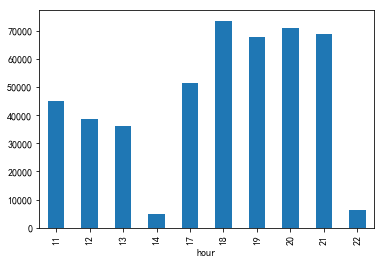

In [39]:
df.groupby('hour').sum()['total'].plot(kind='bar')
# 中午高峰期11 - 13
# 下午高峰期17 - 21

## 5.2 分别计算工作日和周末餐厅营业额的均值
1.映射出字段 分出工作日和周末  
2.再对新字段进行分组，求均值

In [40]:
# 数据映射
df['workingday'] = df['weekday'].map(lambda x: '周末' if x > 4 else '工作日')
df.head()

,detail_id,order_id,dishes_id,dishes_name,itemis_add,counts,amounts,place_order_time,add_inprice,picture_file,emp_id,total,time,hour,weekday,workingday
0,2956,417,610062,蒜蓉生蚝,0,1,49,2016-08-01 11:05:36,0,caipu/104001.jpg,1442,49,2016-08-01 11:05:36,11,0,工作日
1,2958,417,609957,蒙古烤羊腿,0,1,48,2016-08-01 11:07:07,0,caipu/202003.jpg,1442,48,2016-08-01 11:07:07,11,0,工作日
2,2961,417,609950,大蒜苋菜,0,1,30,2016-08-01 11:07:40,0,caipu/303001.jpg,1442,30,2016-08-01 11:07:40,11,0,工作日
3,2966,417,610038,芝麻烤紫菜,0,1,25,2016-08-01 11:11:11,0,caipu/105002.jpg,1442,25,2016-08-01 11:11:11,11,0,工作日
4,2968,417,610003,蒜香包,0,1,13,2016-08-01 11:11:30,0,caipu/503002.jpg,1442,13,2016-08-01 11:11:30,11,0,工作日


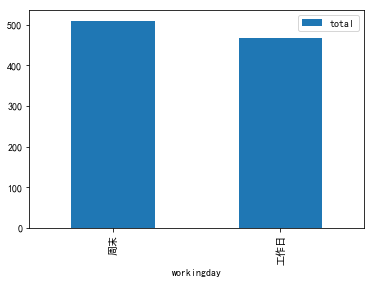

In [50]:
# 订单、工作日、每个订单总价格
df1 = df.groupby(['workingday', 'order_id']).sum()
# 重新赋值索引, 让'workingday', 'order_id'重新变为列，用于后面分组
df1.reset_index(inplace=True)
# 重新分组，求均值
df1.groupby('workingday').mean().plot(kind='bar', y='total')